In [1]:
from row_filter import clean_data_stroke_accy as cds_accy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import *
%matplotlib inline

In [2]:
df_stroke = pd.read_csv('row_data/all_stroke.csv', index_col = 0)

In [3]:
df_stroke, df_dgpsinfo = cds_accy.create_stroke_df(df_stroke)

In [4]:
df_stroke.head()

stroke_idx  sliced_idx  stroke_label  stroke_duration    SR_calc  \
0         414         414             1          3.57495  16.783452   
1         768         768             2          3.53077  16.993461   
2        1103        1103             3          3.35777  17.869003   
3        1476        1476             4          3.72771  16.095672   
4        1830        1830             5          3.57174  16.798537   

   comp_dist  kalman_dist  phone_dist  dgps_dist  KF_avg_vel     ...       \
0   4.664250    13.685648   11.014204  12.149510    4.193678     ...        
1  18.368492     9.803850   13.129867  11.740564    3.116349     ...        
2   9.820554    11.926591   14.045705  11.253511    2.168273     ...        
3  13.678443     9.276884    0.000000  12.410337    2.487979     ...        
4  12.916762    16.450377   25.296634  11.685150    2.812618     ...        

   CF_pos_RMSE  KF_pos_RMSE  phone_pos_RMSE  CF_rel_pos KF_rel_pos  \
0     7.801965     2.245119        5.413988    7.485260   1.536138   
1     5.036838     2.180999        7.368478    6.627928   1.936714   
2     3.422901     1.755677        7.713215    1.432957   0.673080   
3     3.422693     0.936083        6.079662    1.268105   3.133454   
4     2.090278     1.551099        4.731232    1.231612   4.765227   

   phone_rel_pos  rower  SR_desired  direction  kf_constant  
0       1.135307  Elite        16.0         NW        False  
1       1.389303  Elite        16.0         NW        False  
2       2.792193  Elite        16.0         NW        False  
3      12.410337  Elite        16.0         NW        False  
4      13.611484  Elite        16.0         NW         True  

[5 rows x 28 columns]

In [5]:
df_dgpsinfo.head()

stamp  rower  SR_desired direction  kf_constant rate_direction
0  20180422-104956  Elite          16        NW            5           16NW
1  20180422-104427  Elite          16        SE            0           16SE
2  20180422-105906  Elite          20        NW            5           20NW
3  20180422-105358  Elite          20        SE            9           20SE
4  20180422-110625  Elite          24        NW            6           24NW

stroke_idx: associated to the df_phone data index after the df_phone has been cleaned (ie dropped nan values) 

stroke_label: counts from 0-# of strokes for each diffGPS run

stroke_duration: length of stroke according to difference between log_time of stroke_idx, with nans filled in as zeros
    (ie. np.diff(df_phone.log_time[stroke_idx]))

# Plotting

## Bias Plots

In [6]:
import seaborn as sns

single_bias_array = []
double_bias_array = []
rower_single = []
rower_double = []

for i in range(0, len(df_stroke.bias)-1):
    if df_stroke.stroke_label[i+1] == 1:
        if df_stroke.rower[i] == 'Elite':
            single_bias_array.append(df_stroke.bias[i])
            rower_single.append('Elite')
        if df_stroke.rower[i] == 'Club-level':
            double_bias_array.append(df_stroke.bias[i])
            rower_double.append('Club-level')
    if i == (len(df_stroke.bias) - 2):
        double_bias_array.append(df_stroke.bias[i+1])
        rower_double.append('Club-level')
        
df_bias = pd.DataFrame()
df_bias['stroke_rate'] = df_dgpsinfo.SR_desired
df_bias['direction'] = df_dgpsinfo.direction
df_bias['rate_direction'] = df_dgpsinfo.rate_direction
df_bias['bias'] = np.concatenate([single_bias_array, double_bias_array])
df_bias['rower'] = np.concatenate([rower_single, rower_double])
df_bias['rower_direc'] = df_bias.rower.apply(str).str.cat(df_bias.direction, sep = ' ')
df_bias['SR_mean'] = np.concatenate([df_stroke.groupby(['diffGPS_stamp']).mean()['SR_calc'].values[7:],
    df_stroke.groupby(['diffGPS_stamp']).mean()['SR_calc'].values[:7]])
#ax = sns.pointplot(x="stroke_rate", y="bias",data=df_bias[:6], hue='directionrow', markers=["^", "o"])
# ax.set(ylim=(.36, .44))
# ax.set_title("Single Boat")

In [7]:
df_bias

stroke_rate direction rate_direction      bias       rower    rower_direc  \
0            16        NW           16NW  0.394804       Elite       Elite NW   
1            16        SE           16SE  0.398310       Elite       Elite SE   
2            20        NW           20NW  0.407135       Elite       Elite NW   
3            20        SE           20SE  0.415661       Elite       Elite SE   
4            24        NW           24NW  0.415837       Elite       Elite NW   
5            24        SE           24SE  0.415874       Elite       Elite SE   
6            28        NW           28NW  0.438461       Elite       Elite NW   
7            28        SE           28SE  0.456971       Elite       Elite SE   
8            34        SE           34SE  0.479592       Elite       Elite SE   
9            20        NW           20NW  0.356101  Club-level  Club-level NW   
10           22        NW           22NW  0.362033  Club-level  Club-level NW   
11           22        SE           22SE  0.366764  Club-level  Club-level SE   
12           24        NW           24NW  0.371772  Club-level  Club-level NW   
13           24        SE           24SE  0.389582  Club-level  Club-level SE   
14           26        NW           26NW  0.385509  Club-level  Club-level NW   
15           26        SE           26SE  0.392036  Club-level  Club-level SE   

      SR_mean  
0   17.300623  
1   17.196830  
2   20.189282  
3   20.735517  
4   25.400457  
5   23.824201  
6   28.924162  
7   29.299887  
8   34.505900  
9   19.681127  
10  22.587204  
11  22.227707  
12  24.347113  
13  24.044924  
14  26.323754  
15  26.051698

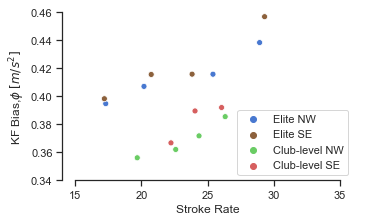

In [8]:
sns.set(style="ticks", palette="muted")
fig, ax = plt.subplots()
fig.set_size_inches(5.25,3.24)
sns.scatterplot(x="SR_mean", y="bias", hue = "rower_direc",\
                      data=df_bias, palette=["#4878D0", "#8C613C", "#6ACC64", "#D65F5F"])
ax.set(xlabel='Stroke Rate', ylabel='KF Bias,$\phi$ $[m/s^2]$')
ax.set(xlim=(14, 36))
ax.set(ylim=(.34, .46))
sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=True)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[1:], labels=labels[1:], loc = 4)

plt.tight_layout()
fig.savefig('row_data/figures/bias.png', dpi = 300)

## Rel Pos Plots

In [9]:
# Only last 10 strokes of trials
df_stroke_last10 = pd.DataFrame()
for trial in range(0, len(df_dgpsinfo)):
    df_last10 = df_stroke[df_stroke.diffGPS_stamp == df_dgpsinfo.stamp[trial]]
    df_last10 = df_last10[df_last10.stroke_label > (len(df_last10) -10)]
    df_stroke_last10 = pd.concat([df_stroke_last10,df_last10]).reset_index(drop=True)

In [10]:
elite_strokes = len(df_stroke_last10[df_stroke_last10.rower == 'Elite'])
club_strokes = len(df_stroke_last10[df_stroke_last10.rower == 'Club-level'])

In [11]:
#Number of elite strokes
print(elite_strokes)

90


In [12]:
#Number of club strokes 
print(club_strokes)

70


In [13]:
df_stroke.head()

stroke_idx  sliced_idx  stroke_label  stroke_duration    SR_calc  \
0         414         414             1          3.57495  16.783452   
1         768         768             2          3.53077  16.993461   
2        1103        1103             3          3.35777  17.869003   
3        1476        1476             4          3.72771  16.095672   
4        1830        1830             5          3.57174  16.798537   

   comp_dist  kalman_dist  phone_dist  dgps_dist  KF_avg_vel     ...       \
0   4.664250    13.685648   11.014204  12.149510    4.193678     ...        
1  18.368492     9.803850   13.129867  11.740564    3.116349     ...        
2   9.820554    11.926591   14.045705  11.253511    2.168273     ...        
3  13.678443     9.276884    0.000000  12.410337    2.487979     ...        
4  12.916762    16.450377   25.296634  11.685150    2.812618     ...        

   CF_pos_RMSE  KF_pos_RMSE  phone_pos_RMSE  CF_rel_pos KF_rel_pos  \
0     7.801965     2.245119        5.413988    7.485260   1.536138   
1     5.036838     2.180999        7.368478    6.627928   1.936714   
2     3.422901     1.755677        7.713215    1.432957   0.673080   
3     3.422693     0.936083        6.079662    1.268105   3.133454   
4     2.090278     1.551099        4.731232    1.231612   4.765227   

   phone_rel_pos  rower  SR_desired  direction  kf_constant  
0       1.135307  Elite        16.0         NW        False  
1       1.389303  Elite        16.0         NW        False  
2       2.792193  Elite        16.0         NW        False  
3      12.410337  Elite        16.0         NW        False  
4      13.611484  Elite        16.0         NW         True  

[5 rows x 28 columns]

In [14]:
df_stroke_last10.SR_desired = list(map(int, df_stroke_last10.SR_desired.values))

In [15]:
#builds dataframes so that all of the information is sorted correctly for seaborn
df_phone_pos = pd.DataFrame()
df_phone_pos['stroke_label'] = df_stroke_last10.stroke_label
df_phone_pos['pos'] = df_stroke_last10.phone_rel_pos
df_phone_pos['vel_rmse'] = df_stroke_last10.phone_vel_RMSE
df_phone_pos['rower'] = df_stroke_last10.rower
df_phone_pos['rate_direction'] =  df_stroke_last10.SR_desired
df_phone_pos['stroke_rate'] = df_stroke_last10.SR_calc
df_phone_pos['data_stream'] = 'SP'
df_phone_pos = df_phone_pos.reset_index(drop=True)

In [16]:
df_kal_pos = pd.DataFrame()
df_kal_pos['stroke_label'] = df_stroke_last10.stroke_label
df_kal_pos['pos'] = df_stroke_last10.KF_rel_pos
df_phone_pos['vel_rmse'] = df_stroke_last10.KF_vel_RMSE
df_kal_pos['rower'] = df_stroke_last10.rower
df_kal_pos['rate_direction'] =  df_stroke_last10.SR_desired
df_kal_pos['stroke_rate'] = df_stroke_last10.SR_calc
df_kal_pos['data_stream'] = 'KF'
df_kal_pos = df_kal_pos.reset_index(drop=True)

In [17]:
df_comp_pos = pd.DataFrame()
df_comp_pos['stroke_label'] = df_stroke_last10.stroke_label
df_comp_pos['pos'] = df_stroke_last10.CF_rel_pos
df_phone_pos['vel_rmse'] = df_stroke_last10.CF_vel_RMSE
df_comp_pos['rower'] = df_stroke_last10.rower
df_comp_pos['rate_direction'] =  df_stroke_last10.SR_desired
df_comp_pos['stroke_rate'] = df_stroke_last10.SR_calc
df_comp_pos['data_stream'] = 'CF'
df_comp_pos = df_comp_pos.reset_index(drop=True)
df_comp_pos = df_comp_pos[df_comp_pos.pos < 100]

In [18]:
frames = [df_phone_pos, df_comp_pos, df_kal_pos]
df_rel_pos = pd.concat(frames, ignore_index=True, sort=True)

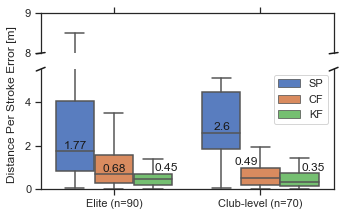

In [73]:
sns.set_style('ticks')
fig, axes = plt.subplots(2, 1, sharex=True, gridspec_kw = {'height_ratios':[1, 3]})
fig.set_size_inches(5.25,3.24)
ax = sns.boxplot(x = "rower", y="pos",
            hue="data_stream",
            data=df_rel_pos, ax=axes[0], showfliers=False)
ax2 = sns.boxplot(x = "rower", y="pos",
            hue="data_stream",
            data=df_rel_pos, showfliers=False)

ax.set_ylim(8, 9)
ax2.set_ylim(0, 5.5)
ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax.xaxis.tick_top()
ax.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()
ax.get_legend().remove()
ax.set(xlabel='', ylabel='')
ax2.set(xlabel='', ylabel='')
d = 0.015
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal
fig.subplots_adjust(hspace=0.2)
plt.ylabel("Distance Per Stroke Error [m]")

medians = df_rel_pos.groupby(['data_stream', 'rower'], sort=False)['pos'].median().values
median_labels = [str(np.round(s, 2)) for s in medians]
pos = range(len(medians))
ax2.text(-.26, medians[0]+0.1, median_labels[0], horizontalalignment='center', color='k')
ax2.text(0, medians[2]+0.1, median_labels[2],  horizontalalignment='center',  color='k')
ax2.text(+.36, medians[4]+0.4, median_labels[4], horizontalalignment='center', color='k')
ax2.text(1-.26, medians[1]+0.1, median_labels[1], horizontalalignment='center', color='k')
ax2.text(1-.1, medians[3]+0.6, median_labels[3],  horizontalalignment='center',  color='k')
ax2.text(1+.36, medians[5]+0.5, median_labels[5], horizontalalignment='center', color='k')

plt.xticks(np.arange(2), ('Elite (n=90)', 'Club-level (n=70)'))
ax2.yaxis.set_label_coords(-0.08, .71)
plt.legend(loc='best')

# plt.tight_layout()
fig.savefig('row_data/figures/dps.png', dpi = 300)

In [20]:
labels[1]

'Elite NW'

In [21]:
df_rel_pos.groupby(['data_stream', 'rower'], sort=False)['pos'].median()

data_stream  rower     
SP           Elite         1.767916
             Club-level    2.595250
CF           Elite         0.684110
             Club-level    0.492807
KF           Elite         0.447336
             Club-level    0.354291
Name: pos, dtype: float64

This is the percentage improvement for the CF and KF relative to the SP.

In [22]:
dps_medians = df_rel_pos.groupby(['data_stream'], sort=False)['pos'].median()

In [23]:
round((dps_medians['SP'] - dps_medians['CF']) / dps_medians['SP'] * 100)

73.0

In [24]:
round((dps_medians['SP'] - dps_medians['KF']) / dps_medians['SP'] * 100)

82.0

In [25]:
df_single = df_rel_pos[df_rel_pos.rower == 'Elite']
# df_single = df_single[df_single.kf_constant == True]

In [26]:
df_single.tail()

data_stream       pos  rate_direction  rower  stroke_label  stroke_rate  \
405          KF  2.772696              34  Elite            18    33.925715   
406          KF  0.492062              34  Elite            19    34.503977   
407          KF  0.677223              34  Elite            20    36.618188   
408          KF  0.866396              34  Elite            21    34.506555   
409          KF  1.685750              34  Elite            22    34.907469   

     vel_rmse  
405       NaN  
406       NaN  
407       NaN  
408       NaN  
409       NaN

In [27]:
df_double = df_rel_pos[df_rel_pos.rower == 'Club-level']
df_double.tail()

data_stream       pos  rate_direction       rower  stroke_label  \
475          KF  0.755395              26  Club-level            17   
476          KF  0.754302              26  Club-level            18   
477          KF  0.208271              26  Club-level            19   
478          KF  0.935736              26  Club-level            20   
479          KF  0.016522              26  Club-level            21   

     stroke_rate  vel_rmse  
475    25.664498       NaN  
476    25.893541       NaN  
477    25.889522       NaN  
478    26.457011       NaN  
479    26.344211       NaN

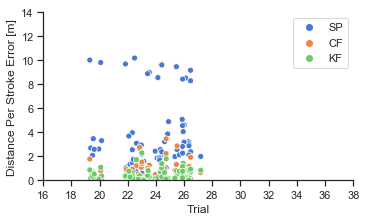

In [28]:
legend = ["SP", "CF", "KF"]
fig, ax = plt.subplots()
fig.set_size_inches(5.25,3.24)
sns.scatterplot(x="stroke_rate", y="pos",
            hue="data_stream", 
            data=df_double, palette= ["#4878D0", "#EE854A", "#6ACC64"])
ax.set(xlabel='Trial', ylabel='Distance Per Stroke Error [m]')
ax.set(ylim=(0, 14))
ax.set(xlim=(16,38))
plt.legend(loc=2)
plt.tight_layout()
sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)

plt.setp(ax.get_legend().get_title(), fontsize='8')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[1:], labels=labels[1:])
plt.locator_params(nbins=12)
fig.savefig('row_data/figures/club_dps.png', dpi = 300)

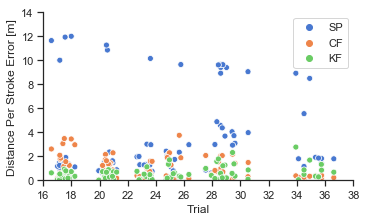

In [29]:
fig, ax = plt.subplots()
sns.set_style("whitegrid")
fig.set_size_inches(5.25,3.24)
sns.scatterplot(x="stroke_rate", y="pos",
            hue="data_stream", 
            data=df_single, palette= ["#4878D0", "#EE854A", "#6ACC64"])
# ax.set_title("Olympian Rower")
ax.set(xlabel='Trial', ylabel='Distance Per Stroke Error [m]')
ax.set(ylim=(0, 14))
ax.set(xlim=(16,38))
plt.legend(loc=1)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[1:], labels=labels[1:])
plt.tight_layout()
sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)

plt.setp(ax.get_legend().get_title(), fontsize='8')
plt.locator_params(nbins=12)
fig.savefig('row_data/figures/elite_dps.png', dpi = 300)

## RMSE velocity plots 

In [30]:
df_RMSE = pd.DataFrame()
RMSE_mean = []
RMSE_std = []
rate_direc = []
data_type = []
rower = []

In [31]:
for i in range(0, (len(df_dgpsinfo))):
    df_run = df_stroke[(df_stroke.diffGPS_stamp == df_dgpsinfo.stamp[i])]
    df_run_const = df_run[df_run.stroke_label > (len(df_run) -10)]
    RMSE_mean.append(np.mean(df_run_const.phone_vel_RMSE.values))
    RMSE_std.append(np.mean(df_run_const.phone_vel_RMSE.values))
    data_type.append('SP')
    RMSE_mean.append(np.mean(df_run_const.CF_vel_RMSE.values))
    RMSE_std.append(np.std(df_run_const.CF_vel_RMSE.values))
    data_type.append('CF')
    RMSE_mean.append(np.mean(df_run_const.KF_vel_RMSE.values))
    RMSE_std.append(np.std(df_run_const.KF_vel_RMSE.values))
    data_type.append('KF')
    rate_direc.append(df_dgpsinfo.rate_direction[i])
    rate_direc.append(df_dgpsinfo.rate_direction[i])
    rate_direc.append(df_dgpsinfo.rate_direction[i])
    rower.append(df_dgpsinfo.rower[i])
    rower.append(df_dgpsinfo.rower[i])
    rower.append(df_dgpsinfo.rower[i])

In [32]:
df_RMSE['mean'] = RMSE_mean
df_RMSE['std'] = RMSE_std
df_RMSE['rate_direc'] = rate_direc
df_RMSE['data_type'] = data_type
df_RMSE['rower'] = rower

In [33]:
phone_rmse = (df_RMSE[df_RMSE.data_type == 'SP']).reset_index(drop=True)
kf_rmse = df_RMSE[df_RMSE.data_type == 'KF'].reset_index(drop=True)
cf_rmse = df_RMSE[df_RMSE.data_type == 'CF'].reset_index(drop=True)

In [34]:
rmse = pd.DataFrame()
rmse['kf_mean'] = kf_rmse["mean"]
rmse['cf_mean'] = cf_rmse["mean"]
rmse['phone_mean'] = phone_rmse["mean"]
rmse['rate_direc'] = kf_rmse.rate_direc
rmse['rower'] = kf_rmse.rower

In [35]:
rmse["KF % Improvement"] = (1 - rmse.kf_mean/rmse.phone_mean)*100
rmse["CF % Improvement"] = (1 - rmse.cf_mean/rmse.phone_mean)*100

In [36]:
rmse.describe()

kf_mean    cf_mean  phone_mean  KF % Improvement  CF % Improvement
count  16.000000  16.000000   16.000000         16.000000         16.000000
mean    0.386458   0.341984    0.569674         34.724315         40.447388
std     0.309307   0.084648    0.077840         39.425622          6.986252
min     0.193167   0.277025    0.454773        -90.285026         19.433560
25%     0.236957   0.292643    0.508713         30.804387         37.195097
50%     0.289672   0.313231    0.555539         50.731886         42.359201
75%     0.359492   0.343490    0.620809         57.846743         45.505773
max     1.457518   0.617111    0.765965         64.175123         46.872626

In [37]:
df_RMSE_sing = df_RMSE[df_RMSE.rower == 'Elite']
df_RMSE_doub = df_RMSE[df_RMSE.rower == 'Club-level']

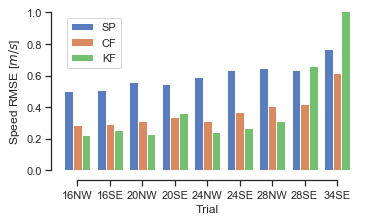

In [38]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(5.25,3.24)
sns.barplot(x="rate_direc", y= "mean", hue = "data_type", data = df_RMSE_sing)
ax.set(xlabel='Trial', ylabel='Speed RMSE [$m/s$]')
ax.set(ylim=(0, 1))
plt.legend(loc=2)
sns.despine(offset=10, trim=True)
plt.tight_layout()
fig.savefig('row_data/figures/elite_rmse.png', dpi = 300)

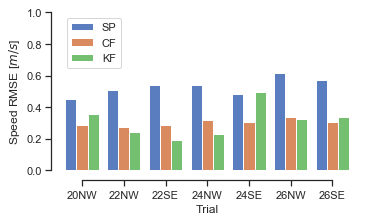

In [39]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(5.25,3.24)
sns.barplot(x="rate_direc", y= "mean", hue = "data_type", data = df_RMSE_doub)
ax.set(xlabel='Trial', ylabel='Speed RMSE [$m/s$]')
#ax.set_title("Club Level Rower")
ax.set(ylim=(0, 1))
plt.legend(loc=2)
sns.despine(offset=10, trim=True)
plt.tight_layout()
fig.savefig('row_data/figures/club_rmse.png', dpi = 300)

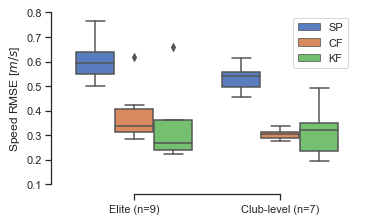

In [40]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(5.25,3.24)
sns.boxplot(x = "rower", y="mean",
            hue="data_type",
            data=df_RMSE)
sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)
ax.set(ylim=(0.1, 0.8))
ax.set(xlabel='', ylabel='Speed RMSE [$m/s$]')
plt.legend(loc='best')
plt.xticks(np.arange(2), ('Elite (n=9)', 'Club-level (n=7)'))
sns.despine(offset=10, trim=True)
plt.tight_layout()
fig.savefig('row_data/figures/rmse_boxplot.png', dpi = 300)

In [41]:
speed_medians = df_RMSE.groupby('data_type')['mean'].median()
speed_medians

data_type
CF    0.313231
KF    0.289672
SP    0.555539
Name: mean, dtype: float64

In [42]:
round((speed_medians['SP'] - speed_medians['CF']) / speed_medians['SP'] * 100)

44.0

In [43]:
round((speed_medians['SP'] - speed_medians['KF']) / speed_medians['SP'] * 100)

48.0

## RMSE Distance plots

In [44]:
df_RMSE = pd.DataFrame()
RMSE_mean = []
RMSE_std = []
rate_direc = []
data_type = []
rower = []

In [45]:
for i in range(0, (len(df_dgpsinfo))):
    df_run = df_stroke[(df_stroke.diffGPS_stamp == df_dgpsinfo.stamp[i])]
    df_run_const = df_run[df_run.stroke_label > (len(df_run) -10)]
    RMSE_mean.append(np.mean(df_run_const.phone_pos_RMSE.values))
    RMSE_std.append(np.mean(df_run_const.phone_pos_RMSE.values))
    data_type.append('SP')
    RMSE_mean.append(np.mean(df_run_const.CF_pos_RMSE.values))
    RMSE_std.append(np.std(df_run_const.CF_pos_RMSE.values))
    data_type.append('CF')
    RMSE_mean.append(np.mean(df_run_const.KF_pos_RMSE.values))
    RMSE_std.append(np.std(df_run_const.KF_pos_RMSE.values))
    data_type.append('KF')
    rate_direc.append(df_dgpsinfo.rate_direction[i])
    rate_direc.append(df_dgpsinfo.rate_direction[i])
    rate_direc.append(df_dgpsinfo.rate_direction[i])
    rower.append(df_dgpsinfo.rower[i])
    rower.append(df_dgpsinfo.rower[i])
    rower.append(df_dgpsinfo.rower[i])

In [46]:
df_RMSE['mean'] = RMSE_mean
df_RMSE['std'] = RMSE_std
df_RMSE['rate_direc'] = rate_direc
df_RMSE['data_type'] = data_type
df_RMSE['rower'] = rower

In [47]:
phone_rmse = (df_RMSE[df_RMSE.data_type == 'SP']).reset_index(drop=True)
kf_rmse = df_RMSE[df_RMSE.data_type == 'KF'].reset_index(drop=True)
cf_rmse = df_RMSE[df_RMSE.data_type == 'CF'].reset_index(drop=True)

In [48]:
rmse = pd.DataFrame()
rmse['kf_mean'] = kf_rmse["mean"]
rmse['cf_mean'] = cf_rmse["mean"]
rmse['phone_mean'] = phone_rmse["mean"]
rmse['rate_direc'] = kf_rmse.rate_direc
rmse['rower'] = kf_rmse.rower

In [49]:
rmse["KF % Improvement"] = (1 - rmse.kf_mean/rmse.phone_mean)*100
rmse["CF % Improvement"] = (1 - rmse.cf_mean/rmse.phone_mean)*100

In [50]:
cf_rmse.head()

mean       std rate_direc data_type  rower
0  0.872013  0.394540       16NW        CF  Elite
1  9.473784  1.869644       16SE        CF  Elite
2  1.135009  0.493044       20NW        CF  Elite
3  1.140853  0.521434       20SE        CF  Elite
4  3.681458  0.568386       24NW        CF  Elite

In [51]:
rmse.describe()

kf_mean    cf_mean  phone_mean  KF % Improvement  CF % Improvement
count  16.000000  16.000000   16.000000         16.000000         16.000000
mean    4.536622   3.309921    5.274794          5.538680         44.408420
std     3.445200   2.607294    2.073317         60.771535         24.783928
min     0.879935   0.872013    3.463330        -98.179263         -4.756344
25%     2.207744   1.228971    3.722947        -29.013320         24.414244
50%     3.530156   2.634506    4.506623          5.077900         48.407453
75%     5.249462   4.281822    6.068214         63.341378         68.041891
max    11.663739   9.473784   10.570470         91.200770         75.184543

In [52]:
df_RMSE_sing = df_RMSE[df_RMSE.rower == 'Elite']
df_RMSE_doub = df_RMSE[df_RMSE.rower == 'Club-level']

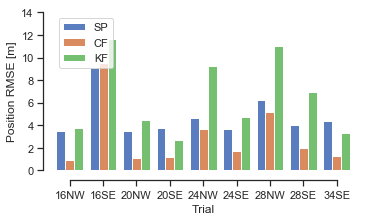

In [53]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(5.25,3.24)
sns.barplot(x="rate_direc", y= "mean", hue = "data_type", data = df_RMSE_sing)
ax.set(xlabel='Trial', ylabel='Position RMSE [m]')
#ax.set_title("Elite Rower")
ax.set(ylim=(0, 14))
plt.legend(loc=2)
sns.despine(offset=10, trim=True)
plt.tight_layout()
fig.savefig('row_data/figures/elite_rmse_pos.png', dpi = 300)

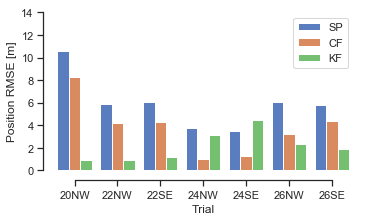

In [54]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(5.25,3.24)
sns.barplot(x="rate_direc", y= "mean", hue = "data_type", data = df_RMSE_doub)
ax.set(xlabel='Trial', ylabel='Position RMSE [m]')
#ax.set_title("Club Level Rower")
ax.set(ylim=(0,14))
plt.legend(loc=1)
sns.despine(offset=10, trim=True)
plt.tight_layout()
fig.savefig('row_data/figures/club_rmse_pos.png', dpi = 300)

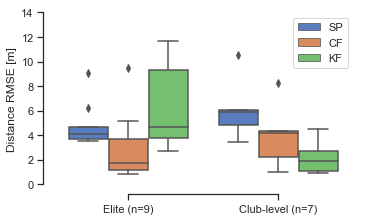

In [55]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(5.25,3.24)
sns.boxplot(x = "rower", y="mean",
            hue="data_type", 
            data=df_RMSE)
# ax.set_title("Olympian Rower")
ax.set(ylim=(0, 14))
ax.set(xlabel='', ylabel='Distance RMSE [m]')
sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)
plt.legend(loc='best')
plt.xticks(np.arange(2), ('Elite (n=9)', 'Club-level (n=7)'))
sns.despine(offset=10, trim=True)
plt.tight_layout()
fig.savefig('row_data/figures/rmse_pos_boxplot.png', dpi = 300)

In [56]:
df_RMSE.head()

mean       std rate_direc data_type  rower
0  3.513991  3.513991       16NW        SP  Elite
1  0.872013  0.394540       16NW        CF  Elite
2  3.739098  0.390858       16NW        KF  Elite
3  9.043637  9.043637       16SE        SP  Elite
4  9.473784  1.869644       16SE        CF  Elite

In [57]:
dist_medians = df_RMSE.groupby('data_type')['mean'].median()
dist_medians

data_type
CF    2.634506
KF    3.530156
SP    4.506623
Name: mean, dtype: float64

In [58]:
round((dist_medians['SP'] - dist_medians['CF']) / dist_medians['SP'] * 100)

42.0

In [59]:
round((dist_medians['SP'] - dist_medians['KF']) / dist_medians['SP'] * 100)

22.0

# DGPS Dataframe

In [60]:
df_stroke.head()

stroke_idx  sliced_idx  stroke_label  stroke_duration    SR_calc  \
0         414         414             1          3.57495  16.783452   
1         768         768             2          3.53077  16.993461   
2        1103        1103             3          3.35777  17.869003   
3        1476        1476             4          3.72771  16.095672   
4        1830        1830             5          3.57174  16.798537   

   comp_dist  kalman_dist  phone_dist  dgps_dist  KF_avg_vel     ...       \
0   4.664250    13.685648   11.014204  12.149510    4.193678     ...        
1  18.368492     9.803850   13.129867  11.740564    3.116349     ...        
2   9.820554    11.926591   14.045705  11.253511    2.168273     ...        
3  13.678443     9.276884    0.000000  12.410337    2.487979     ...        
4  12.916762    16.450377   25.296634  11.685150    2.812618     ...        

   CF_pos_RMSE  KF_pos_RMSE  phone_pos_RMSE  CF_rel_pos KF_rel_pos  \
0     7.801965     2.245119        5.413988    7.485260   1.536138   
1     5.036838     2.180999        7.368478    6.627928   1.936714   
2     3.422901     1.755677        7.713215    1.432957   0.673080   
3     3.422693     0.936083        6.079662    1.268105   3.133454   
4     2.090278     1.551099        4.731232    1.231612   4.765227   

   phone_rel_pos  rower  SR_desired  direction  kf_constant  
0       1.135307  Elite        16.0         NW        False  
1       1.389303  Elite        16.0         NW        False  
2       2.792193  Elite        16.0         NW        False  
3      12.410337  Elite        16.0         NW        False  
4      13.611484  Elite        16.0         NW         True  

[5 rows x 28 columns]

In [61]:
df_dgps = pd.DataFrame()
df_dgps['stroke_label'] = df_stroke.stroke_label
df_dgps['stroke_duration'] = df_stroke.stroke_duration
df_dgps['stroke_distance'] = df_stroke.dgps_dist
df_dgps['stroke_speed'] = df_stroke.dgps_avg_vel
df_dgps['SR_desired'] = df_stroke.SR_desired
df_dgps['direction'] = df_stroke.direction
df_dgps['rower'] = df_stroke.rower
df_dgps['diffGPS_stamp'] = df_stroke.diffGPS_stamp

In [62]:
df_dgps.to_csv('row_data/dgps_data.csv')

In [63]:
df_dgps.groupby(['rower', 'SR_desired', 'direction']).std()

stroke_label  stroke_duration  \
rower      SR_desired direction                                  
Club-level 20.0       NW             9.669540         0.066042   
           22.0       NW             8.225975         0.118514   
                      SE             7.071068         0.064755   
           24.0       NW             7.648529         0.074858   
                      SE             7.071068         0.068733   
           26.0       NW             8.514693         0.055899   
                      SE             6.204837         0.045799   
Elite      16.0       NW             5.916080         0.109852   
                      SE             7.937254         0.079445   
           20.0       NW             5.916080         0.042690   
                      SE             6.493587         0.228810   
           24.0       NW             7.071068         0.078935   
                      SE             5.916080         0.068031   
           28.0       NW             7.071068         0.052786   
                      SE             7.071068         0.043482   
           34.0       SE             6.493587         0.346171   

                                 stroke_distance  stroke_speed  
rower      SR_desired direction                                 
Club-level 20.0       NW                0.255485      0.060968  
           22.0       NW                0.365104      0.064402  
                      SE                0.240092      0.071312  
           24.0       NW                0.269128      0.090468  
                      SE                0.285614      0.054604  
           26.0       NW                0.203252      0.067910  
                      SE                0.202192      0.081268  
Elite      16.0       NW                0.281343      0.061327  
                      SE                0.351555      0.071853  
           20.0       NW                0.204116      0.035831  
                      SE                0.645960      0.147366  
           24.0       NW                0.210911      0.068415  
                      SE                0.227085      0.098323  
           28.0       NW                0.195643      0.094765  
                      SE                0.223790      0.057311  
           34.0       SE                1.864956      0.118312

In [64]:
df_describe = pd.DataFrame()
df_describe['rower'] = ['Club-level','Club-level','Club-level','Club-level','Elite',\
                       'Elite','Elite','Elite','Elite']
df_describe['SR_desired'] = [20,22,24,26,16,20,24,28,34]
df_describe['duration_mean'] = df_dgps.groupby(['rower', 'SR_desired']).mean()['stroke_duration'].values
df_describe['duration_std'] = df_dgps.groupby(['rower', 'SR_desired']).std()['stroke_duration'].values
df_describe['distance_mean'] = df_dgps.groupby(['rower', 'SR_desired']).mean()['stroke_distance'].values
df_describe['distance_std'] = df_dgps.groupby(['rower', 'SR_desired']).std()['stroke_distance'].values
df_describe['speed_mean'] = df_dgps.groupby(['rower', 'SR_desired']).mean()['stroke_speed'].values
df_describe['speed_std'] = df_dgps.groupby(['rower', 'SR_desired']).std()['stroke_speed'].values

In [65]:
df_describe_rower = pd.DataFrame()
df_describe_rower['rower'] = ['Club-level_Total','Elite_Total']
df_describe_rower['SR_desired'] = [0,0]
df_describe_rower['duration_mean'] = df_describe.groupby(['rower']).mean()['duration_mean'].values
df_describe_rower['duration_std'] = df_describe.groupby(['rower']).std()['duration_mean'].values
df_describe_rower['distance_mean'] = df_describe.groupby(['rower']).mean()['distance_mean'].values
df_describe_rower['distance_std'] = df_describe.groupby(['rower']).std()['distance_mean'].values
df_describe_rower['speed_mean'] = df_describe.groupby(['rower']).mean()['speed_mean'].values
df_describe_rower['speed_std'] = df_describe.groupby(['rower']).std()['speed_mean'].values

In [66]:
df = pd.concat([df_describe, df_describe_rower], ignore_index=True)

In [67]:
df.to_csv('row_data/dgps_data_describe.csv')

In [68]:
df.head()

rower  SR_desired  duration_mean  duration_std  distance_mean  \
0  Club-level          20       3.050014      0.066042      10.050294   
1  Club-level          22       2.683089      0.099404       9.732035   
2  Club-level          24       2.482435      0.072979       9.326882   
3  Club-level          26       2.294247      0.052800       8.835992   
4       Elite          16       3.479393      0.093151      12.229409   

   distance_std  speed_mean  speed_std  
0      0.255485    3.301546   0.060968  
1      0.467253    3.633547   0.171791  
2      0.450283    3.751619   0.180960  
3      0.397525    3.851142   0.176050  
4      0.445779    3.513655   0.121006